In [1]:
import numpy as np
import pandas as pd
from glob import glob
# merge csv files
yelp = pd.read_csv('yelp_reviews.csv')


print(yelp.shape)
yelp.head()

(7012462, 2)


,review_stars,text
0,4,What a treat it was to find Sidebar in Downtow...
1,5,I love Sunchain! I have been a customer for ov...
2,3,The food is good. But the service is suck comp...
3,1,We went here the first week they opened and we...
4,1,"Beware, discriminating amongst the gay communi..."


Text(0, 0.5, 'Reviews of yelp dataset')

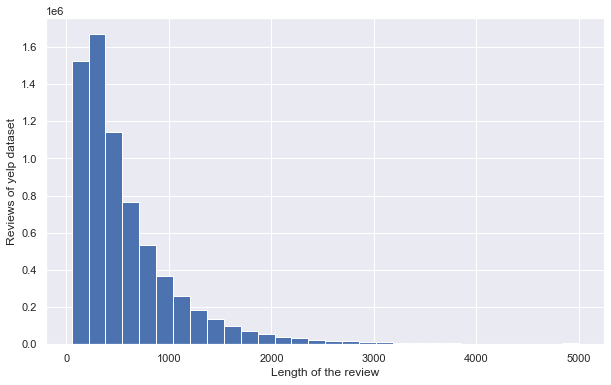

In [2]:
import matplotlib.pyplot as plt
import seaborn


plt.rc('figure', figsize=(10,6))
seaborn.set()
colors = seaborn.color_palette()
yelp.text.dropna().str.len().hist(bins=30)
plt.xlabel('Length of the review')
plt.ylabel('Number of reviews')
plt.ylabel('Reviews of yelp dataset')

In [3]:
sorted(yelp['review_stars'].unique())

[1, 2, 3, 4, 5]

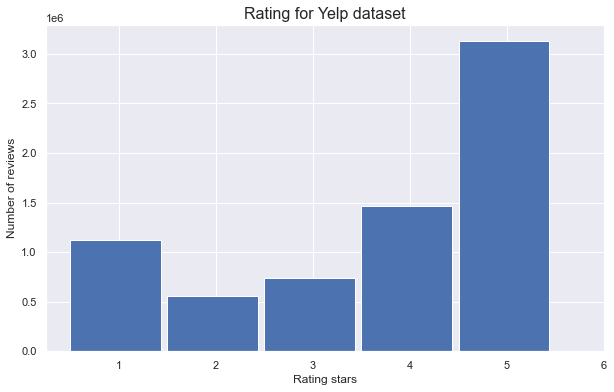

In [4]:
bins = [1 ,2 ,3 ,4, 5, 6]
yelp.review_stars.hist(bins=bins, align='left', width=0.93)
plt.xticks(bins)
plt.xlabel('Rating stars')
plt.ylabel('Number of reviews')
plt.title("Rating for Yelp dataset", fontsize=16)
plt.show()

In [5]:
#Average Rating of Fitness
ratings = list(yelp['review_stars'])
print("Average Rating of Yelp dataset is:",sum(ratings)/len(ratings))

Average Rating of Yelp dataset is: 3.7014236939893577


In [6]:
#average length of reviews
totalreviews = list(yelp['text'])
length = []
for i in range(0,len(totalreviews)):
        totalreviews[i] = str(totalreviews[i])
        a = len(totalreviews[i].split(' '))
        length.append(a)

    
print("On average a review length of Yelp dataset has about:", sum(length)/len(length))

On average a review length of Yelp dataset has about: 110.77891773245973


In [7]:
#total reviews number
len(length)

7012462

In [8]:
yelp['length'] =  length
yelp['ratings'] =  ratings
five_star = yelp.loc[yelp['ratings'] == 5,:]
five = sum(five_star['length'])/len(five_star['length'])
four_star = yelp.loc[yelp['ratings'] == 4,:]
four = sum(four_star['length'])/len(four_star['length'])
three_star = yelp.loc[yelp['ratings'] == 3,:]
three = sum(three_star['length'])/len(three_star['length'])
two_star = yelp.loc[yelp['ratings'] == 2,:]
two = sum(two_star['length'])/len(two_star['length'])
one_star = yelp.loc[yelp['ratings'] == 1,:]
one = sum(one_star['length'])/len(one_star['length'])

In [10]:
print("five:",five,"four:",four,"three:",three,"two:",two,"one:",one)

five: 87.36198927081772 four: 114.31989293512908 three: 131.54477173052345 two: 141.62237319362083 one: 142.536535566161


In [13]:
#5 star has the shortest review length, 2 star has the longest

c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


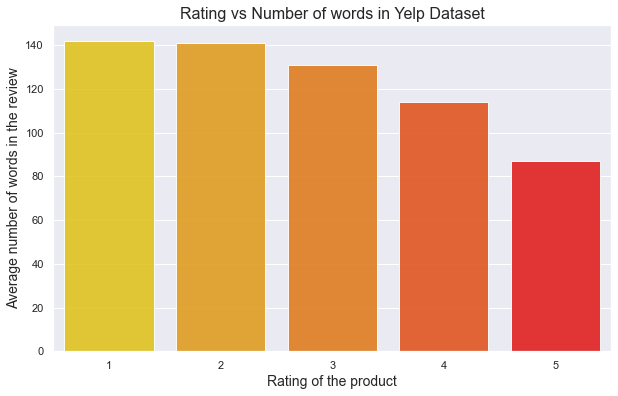

In [9]:
colors = ['#ffd900', '#ffa600','#ff7b00', '#ff4800', '#ff0000']
seaborn.set_palette(seaborn.color_palette(colors))
top = ['1','2','3','4','5']
value = [int(one), int(two),int(three),int(four),int(five)]
seaborn.barplot(top, value, alpha=0.9)
plt.xlabel('Rating of the product', fontsize=14)
plt.ylabel('Average number of words in the review', fontsize=14)
plt.title("Rating vs Number of words in Yelp Dataset", fontsize=16)
plt.show()

# Baseline

In [10]:
#The simplest baseline for each of these predictive tasks is a model that always predicts the most common rating.
yelp['baseline_rating'] = 5

print("Baseline of Yelp Dataset = 5" )

Baseline of Yelp Dataset = 5


In [11]:
t = yelp[['review_stars', 'baseline_rating']].dropna(how='any')

In [12]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


precision = metrics.precision_score(t.review_stars, t.baseline_rating, average='macro')
recall = metrics.recall_score(t.review_stars, t.baseline_rating, average='macro')
f1 = metrics.f1_score(t.review_stars, t.baseline_rating, average='macro')
accuracy = accuracy_score(t.review_stars, t.baseline_rating)

baselineResult = {}

data = {'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'accuracy':accuracy}

baselineResult['Baseline of Yelp dataset'] = data
pd.DataFrame(baselineResult).T

c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,f1_score,precision,recall
Baseline of Yelp dataset,0.446849,0.123537,0.08937,0.2


# ________________________________________

In [3]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer 
# Term frequency (TF) - Inverse Document Frequency (IDF)

In [14]:
#C=0.4， epsilon=0.5 is the best
# try ngram = 1,3

In [4]:
# Instances for pipeline
#verbose = to show progress, higher number show more details
#n_jobs = n of process running in parallelly
svr = LinearSVR(verbose=2, C=0.4, epsilon=0.5)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2),encoding='utf-8')

# from here train_test_split
from here

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yelp['text'], yelp['review_stars'], test_size=0.3, random_state=1)

In [6]:
pipe_Yelp = Pipeline([('vect', vect), ('svr', svr)])

In [7]:
pipe_Yelp.fit(X_train,y_train)

[LibLinear]

Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('svr', LinearSVR(C=0.4, epsilon=0.5, verbose=2))])

In [8]:
y_pred=pipe_Yelp.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
import sklearn.metrics as metrics

#If True returns MSE value
# final run for linearSVR C=0.4 E=0.5
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)


# Print metrics
print('ngram(1,2) SVR c=0.4,epsilon=0.5 for Yelpdataset')
print('Mean Absolute Error:', round(mae, 5))
print('Mean Squared Error:', round(mse, 5))
print('Root Mean Squared Error:', round(rmse, 5))
print('R-squared scores:', round(r2, 5))

ngram(1,2) SVR c=0.4,epsilon=0.5 for Yelpdataset
Mean Absolute Error: 0.58301
Mean Squared Error: 0.56529
Root Mean Squared Error: 0.75186
R-squared scores: 0.74594


In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
import sklearn.metrics as metrics

#If True returns MSE value
# final run for linearSVR C=0.5 E=0.5
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)


# Print metrics
print('SVR c=0.5,epsilon=0.5 for Yelpdataset')
print('Mean Absolute Error:', round(mae, 4))
print('Mean Squared Error:', round(mse, 4))
print('Root Mean Squared Error:', round(rmse, 4))
print('R-squared scores:', round(r2, 4))

SVR c=0.5,epsilon=0.5 for Yelpdataset
Mean Absolute Error: 0.6369
Mean Squared Error: 0.6742
Root Mean Squared Error: 0.8211
R-squared scores: 0.697


In [14]:
my_review = ["I already knew App Academy would be tough before I applied, but I never would've thought it was the most difficult experience I had ever imagine. As someone with no prior coding experience, I would say the first few weeks were really hard on me and it doesn't get easier. Eventually, it's something that everyone gets accustomed to. Before I knew it, it was 3 months already and I can finally tell people that I'm a software developer.To sum things up, App Academy is harder than anything you imagined, but it will also be the most rewarding experience in your life."]
pipe_Yelp.predict(my_review)[0]

3.696853543632373

In [ ]:
#third run

print('SVR for Yelp dataset c=0.5epsilon=0.5')
error2 = pd.DataFrame({'Actual-Values': np.array(y_test).flatten(), 'Predicted-Values': y_pred.flatten()})
error2.head(30) #try for linear

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect,
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.5,1,1.5),
    #'clf__epsilon': (0.1,0.5,1)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 5)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.5,1,1.5),
    #'clf__epsilon': (0.1,0.5,1)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 5)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 37.3min finished


Best score of r^2:  0.687441012072446
Best parameter set:
clf LinearSVR(C=0.5)
clf__C 0.5
clf__dual True
clf__epsilon 0.0
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.5))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.5,0.6,0.7,0.8),
    'clf__epsilon': (0.4,0.5,0.6,0.7,0.8)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 5)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:  5.2min finished


Best score of r^2:  0.7104750057225585
Best parameter set:
clf LinearSVR(C=0.6, epsilon=0.5)
clf__C 0.6
clf__dual True
clf__epsilon 0.5
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=0.6, epsilon=0.5))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.01, 0.1, 1, 10)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 5)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   30.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   30.1s finished


Best score:  0.6910556900492614
Best parameter set:
clf LinearSVR(C=1)
clf__C 1
clf__dual True
clf__epsilon 0.0
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=1))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

pipeline = Pipeline([
    ('vect', vect),
    ('clf', LinearSVR())
])

parameters = {
    'clf__C': (0.01, 0.1, 1, 10)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, scoring='r2', verbose=2, cv = 5)
    
grid_search.fit(X_train, y_train)
print('Best score of r^2: ', grid_search.best_score_)
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(best_parameters):
    print(param_name, best_parameters[param_name])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   51.0s finished


Best score of r^2:  0.6933886378115067
Best parameter set:
clf LinearSVR(C=1)
clf__C 1
clf__dual True
clf__epsilon 0.0
clf__fit_intercept True
clf__intercept_scaling 1.0
clf__loss epsilon_insensitive
clf__max_iter 1000
clf__random_state None
clf__tol 0.0001
clf__verbose 0
memory None
steps [('vect', TfidfVectorizer(stop_words='english')), ('clf', LinearSVR(C=1))]
vect TfidfVectorizer(stop_words='english')
vect__analyzer word
vect__binary False
vect__decode_error strict
vect__dtype <class 'numpy.float64'>
vect__encoding utf-8
vect__input content
vect__lowercase True
vect__max_df 1.0
vect__max_features None
vect__min_df 1
vect__ngram_range (1, 1)
vect__norm l2
vect__preprocessor None
vect__smooth_idf True
vect__stop_words english
vect__strip_accents None
vect__sublinear_tf False
vect__token_pattern (?u)\b\w\w+\b
vect__tokenizer None
vect__use_idf True
vect__vocabulary None
verbose False


In [23]:
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [ ]:
#regression

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
import sklearn.metrics as metrics


In [11]:
#If True returns MSE value
# final run for linearSVR
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)


# Print metrics
print('SVR for Yelpdataset c=0.5')
print('Mean Absolute Error:', round(mae, 4))
print('Mean Squared Error:', round(mse, 4))
print('Root Mean Squared Error:', round(rmse, 4))
print('R-squared scores:', round(r2, 4))

SVR for Yelpdataset c=0.5
Mean Absolute Error: 0.6351
Mean Squared Error: 0.6924
Root Mean Squared Error: 0.8321
R-squared scores: 0.6888


In [12]:
my_review = ["I already knew App Academy would be tough before I applied, but I never would've thought it was the most difficult experience I had ever imagine. As someone with no prior coding experience, I would say the first few weeks were really hard on me and it doesn't get easier. Eventually, it's something that everyone gets accustomed to. Before I knew it, it was 3 months already and I can finally tell people that I'm a software developer.To sum things up, App Academy is harder than anything you imagined, but it will also be the most rewarding experience in your life."]
pipe_Yelp.predict(my_review)[0]

3.995306828137153

In [11]:
#third run

print('ngram(1,2) SVR for Yelp dataset c=0.4,epsilon=0.5 ')
error2 = pd.DataFrame({'Actual-Rating': np.array(y_test).flatten(), 'Predicted-Rating': y_pred.flatten()})
error2.head(34) #try for linear

ngram(1,2) SVR for Yelp dataset c=0.4,epsilon=0.5 


,Actual-Rating,Predicted-Rating
0,1,0.748015
1,4,3.929585
2,4,4.457121
3,1,2.021598
4,5,4.293232
5,4,4.611274
6,5,5.740352
7,4,3.330412
8,3,1.894394
9,5,4.662873


In [38]:
#third run

print('SVR for Yelp dataset c=0.4,epsilon=0.5 ')
error2 = pd.DataFrame({'Actual-Rating': np.array(y_test).flatten(), 'Predicted-Rating': y_pred.flatten()})
error2.head(34) #try for linear

SVR for Yelp dataset c=0.4,epsilon=0.5 


,Actual-Rating,Predicted-Rating
0,1,1.544758
1,4,3.272713
2,4,4.396775
3,1,2.327762
4,5,4.258282
5,4,4.448288
6,5,5.740196
7,4,3.681693
8,3,2.002538
9,5,4.662285


In [11]:
import pickle
pickle.dump(pipe_Yelp, open('yelp_review_predict_star.pkl', 'wb'))

In [52]:
#If True returns MSE value
# 3rd run
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)


# Print metrics
print('SVR for Fitness c=1')
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(rmse, 2))
print('R-squared scores:', round(r2, 2))

SVR for Fitness c=1
Mean Absolute Error: 0.6
Mean Squared Error: 0.69
Root Mean Squared Error: 0.83
R-squared scores: 0.7


In [34]:
#If True returns MSE value
# 3rd run
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)

#错了，这次用的是svc
# Print metrics
print('SVR for Fitness c=1')
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(rmse, 2))
print('R-squared scores:', round(r2, 2))


SVR for Fitness c=1
Mean Absolute Error: 0.37
Mean Squared Error: 0.72
Root Mean Squared Error: 0.85
R-squared scores: 0.69


In [14]:
#If True returns MSE value
# 4th run
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('RandomforestRegression of n=500')
print('Mean Absolute Error:', round(mae, 3))
print('Mean Squared Error:', round(mse, 3))
print('Root Mean Squared Error:', round(rmse, 3))
print('R-squared scores:', round(r2, 3))

RandomforestRegression of n=500
Mean Absolute Error: 0.584
Mean Squared Error: 0.808
Root Mean Squared Error: 0.899
R-squared scores: 0.647


In [15]:
#Return the coefficient of determination R^2 of the prediction.
#4th run
pipe_Yelp.score(yelp['text'].values.astype('U'), yelp['review_stars'])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    4.8s finished


0.8606249654956958

In [20]:
#Return the coefficient of determination R^2 of the prediction.
#third run
pipe_Yelp.score(yelp['text'].values.astype('U'), yelp['review_stars'])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    2.7s finished


0.8605395415394025

In [53]:
#third run

print('SVR for Fitness c=1')
error2 = pd.DataFrame({'Actual-Values': np.array(y_test).flatten(), 'Predicted-Values': y_pred.flatten()})
error2.head(20) #try for linear

SVR for Fitness c=1


,Actual-Values,Predicted-Values
0,4,4.873715
1,5,5.707748
2,3,3.286951
3,5,5.106412
4,3,3.328906
5,3,4.366260
6,5,4.916705
7,5,4.922002
8,5,3.738722
9,1,2.572709


In [16]:
my_review = ["I already knew App Academy would be tough before I applied, but I never would've thought it was the most difficult experience I had ever imagine. As someone with no prior coding experience, I would say the first few weeks were really hard on me and it doesn't get easier. Eventually, it's something that everyone gets accustomed to. Before I knew it, it was 3 months already and I can finally tell people that I'm a software developer.To sum things up, App Academy is harder than anything you imagined, but it will also be the most rewarding experience in your life."]
pipe_Yelp.predict(my_review)[0]

3.995306828137153

In [10]:
import pickle
pickle.dump(pipe_Yelp, open('yelp_review_predict_star.pkl', 'wb'))

# 3. Training Model

In [17]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer 
# Term frequency (TF) - Inverse Document Frequency (IDF)

In [19]:
# Instances for pipeline
#verbose = to show progress, higher number show more details
#n_jobs = n of process running in parallelly
svr = LinearSVR(verbose=2, C=0.4, epsilon=0.5)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1),encoding='utf-8')

In [19]:
# Specify the pipeline
pipe_Yelp = Pipeline([('vect', vect), ('svr', svr)])
#or we can just set test_size=1 from train_test_split
pipe_Yelp.fit(yelp['text'], yelp['review_stars'])

[LibLinear]

Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('svr', LinearSVR(C=0.4, epsilon=0.5, verbose=2))])

In [25]:
#Return the coefficient of determination R^2 of the prediction.
pipe_Yelp.score(yelp['text'], yelp['review_stars'])

0.7056095047544959

In [20]:
import pickle
pickle.dump(pipe_Yelp, open('yelp_review_predict_star.pkl', 'wb'))

In [21]:
my_review = ["I already knew App Academy would be tough before I applied, but I never would've thought it was the most difficult experience I had ever imagine. As someone with no prior coding experience, I would say the first few weeks were really hard on me and it doesn't get easier. Eventually, it's something that everyone gets accustomed to. Before I knew it, it was 3 months already and I can finally tell people that I'm a software developer.To sum things up, App Academy is harder than anything you imagined, but it will also be the most rewarding experience in your life."]
pipe_Yelp.predict(my_review)[0]

3.8388340558414473